In [2]:
import torch
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import torch.nn.functional as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [5]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize images to the required input size of your model
    transforms.ToTensor(),
])

test_dataset = ImageFolder('Lung cancer dataset 2/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [8]:
model = torch.load('best_lung_cancer_model.h5')
model.eval()  # Set the model to evaluation mode

correct = 0
total = 0

with torch.no_grad():  # Disable gradient computation during inference
    for images, labels in test_loader:
        outputs = model(images)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get the predicted class

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test data: {accuracy:.2f}%')


UnpicklingError: invalid load key, 'H'.

In [4]:
# train_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/chest_ct_scan/Data/train"
# test_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/chest_ct_scan/Data/test"

# train_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/Combined_lung_cancer/train"
# test_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/Combined_lung_cancer/test"

train_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/Combined_lung_cancer 2/train"
test_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/Combined_lung_cancer 2/test"
valid_data_directory = r"C:/Users/user/Documents/Machine learning/Datasets/chest_ct_scan/Data/valid"

In [5]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_data_directory,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28,28),
    labels="inferred"
)

test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_directory,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28,28),
    labels="inferred"
)

valid_data = tf.keras.utils.image_dataset_from_directory(
    valid_data_directory,
    color_mode="grayscale",
    batch_size=32,
    image_size=(28,28),
    labels="inferred"
)


Found 1663 files belonging to 2 classes.
Found 278 files belonging to 2 classes.
Found 63 files belonging to 2 classes.


In [52]:

# THE MODEL
model = tf.keras.Sequential([
    # FIRST COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # # SECOND COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

     # # THIRD COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),


    # FLAATEN LAYER FOR THE ANN
    tf.keras.layers.Flatten(),

    # HIDDEN LAYERS
    # tf.keras.layers.Dense(2048, activation=tf.nn.relu),
    # tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#     tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),

    # OUTPUTR LAYER
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(train_data, batch_size=32, epochs=20)



Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002493E65FDC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002493E65FDC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002493E65FDC0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
49/49 [==============================] - 90s 2s/step - loss: 1.4631 - accuracy: 0.5729
Epoch 2/20
49/49 [==============================] - 78s 2s/step - loss: 0.3926 - accuracy: 0.8354
Epoch 3/20
49/49 [==============================] - 69s 1s/step - loss: 0.1703 - accuracy: 0.9430
Epoch 4/20
49/49 [==============================] - 60s 1s/step - loss: 0.1025 - accuracy: 0.9605
Epoch 5/20
49/49 [==============================] - 27s 5

In [57]:

# THE MODEL
model = tf.keras.Sequential([
    # FIRST COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # # SECOND COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

     # # THIRD COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),


    # FLAATEN LAYER FOR THE ANN
    tf.keras.layers.Flatten(),

    # HIDDEN LAYERS
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),

    # OUTPUTR LAYER
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(train_data, batch_size=32, epochs=20)



Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000024941053040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000024941053040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000024941053040>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
49/49 [==============================] - 16s 289ms/step - loss: 1.0906 - accuracy: 0.6150
Epoch 2/20
49/49 [==============================] - 12s 232ms/step - loss: 0.4603 - accuracy: 0.7894
Epoch 3/20
49/49 [==============================] - 7s 132ms/step - loss: 0.3546 - accuracy: 0.8458
Epoch 4/20
49/49 [==============================] - 7s 136ms/step - loss: 0.1515 - accuracy: 0.9410
Epoch 5/20
49/49 [=============================

In [66]:

# THE MODEL
model = tf.keras.Sequential([
    # FIRST COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(32, 3, input_shape=(28,28,1), activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    # # SECOND COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

     # # THIRD COVULUTIONAL LAYER
    tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),


    # FLAATEN LAYER FOR THE ANN
    tf.keras.layers.Flatten(),

    # HIDDEN LAYERS
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),

    # OUTPUTR LAYER
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)

])

model.compile(optimizer=tf.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

model.fit(train_data, batch_size=32, epochs=20)



Epoch 1/20
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002494803F160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002494803F160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002494803F160>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
52/52 [==============================] - 20s 310ms/step - loss: 0.9151 - accuracy: 0.6446
Epoch 2/20
52/52 [==============================] - 13s 248ms/step - loss: 0.3687 - accuracy: 0.8515
Epoch 3/20
52/52 [==============================] - 9s 175ms/step - loss: 0.2346 - accuracy: 0.8966
Epoch 4/20
52/52 [==============================] - 7s 125ms/step - loss: 0.0790 - accuracy: 0.9741
Epoch 5/20
52/52 [=============================

In [24]:
# predictions = model.predict(test_data)
evaluation = model.evaluate(valid_data)

print(evaluation)

2/2 [==============================] - 1s 17ms/step - loss: 0.2312 - accuracy: 0.9365
[0.2311723828315735, 0.9365079402923584]


In [68]:
tf.autograph.experimental.do_not_convert
model.save("best_lung_cancer_model.h5")
model.save("best_lung_cancer_model")

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002494803F700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002494803F700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x000002494803F700>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000249481E5D30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: coul

Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000249481E5D30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x00000249481E5D30>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: best_lung_cancer_model\assets


INFO:tensorflow:Assets written to: best_lung_cancer_model\assets


In [60]:
model = tf.keras.models.load_model("best_lung_cancer_model.h5")
input_shape = model.layers[0].input_shape
print("Expected input shape:", input_shape)

import matplotlib.pyplot as plt
import numpy as np

# Define the file path of the image you want to load
image_path = 'C:/Users/user/Documents/Machine learning/Datasets/chest_ct_scan/Data/valid/normal/4(2).png'  # Replace with the actual file path


# Load the image using TensorFlow
image = tf.io.read_file(image_path)
image = tf.image.decode_image(image)
print(image.shape)
grayscale_image = np.mean(image[:, :, :3], axis=2)
grayscale_image = np.expand_dims(grayscale_image, axis=2)
resized_image = tf.image.resize(grayscale_image, size=(28, 28))
print(resized_image.shape)
img = np.array([resized_image])
print(img.shape)


# resized_image = image[:, :, :1]
# print(resized_image.shape)

# resized_image = tf.image.resize(image, size=(28, 28,1))
# resized_image = tf.expand_dims(resized_image, axis=0)  # Adds a batch dimension with size 1

# resized_image = tf.ensure_shape(resized_image, (None, 28, 28, 1))
# print(resized_image.shape)

# your_image = cv2.imread(image_path) 
# # Load and resize your image to (28, 28)
# input_image = cv2.resize(your_image, (28, 28))

# # Handle the 4 channels (e.g., take the average)
# input_image = np.mean(input_image, axis=2)

# # Normalize the image if your model expects normalized inputs
# input_image = input_image / 255.0  # You can adjust this if your model uses different scaling

# # Add a batch dimension to match the model's input shape
# input_image = np.expand_dims(input_image, axis=0)

# print(input_image.shape)
# Display the image using Matplotlib
# plt.imshow(input_image)
plt.imshow(resized_image)
plt.axis('off')  # Optional: Turn off axis labels
plt.show()

# # resized_data = tf.image.resize(input_image, size=(28, 28))
pred = model.predict(img)

print(pred)



Expected input shape: (None, 28, 28, 1)
(481, 617, 4)


error: OpenCV(4.6.0) c:\b\abs_f8n1j3l9l0\croot\opencv-suite_1691622637237\work\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x4d30d89e::Set<1,-1,-1>,struct cv::impl::A0x4d30d89e::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


In [36]:
train_folder_path = 'Downloads/Lung cancer dataset/train'
total_images_count = 0
subfolders = os.listdir(train_folder_path)
for subfolder in subfolders:
    subfolder_path = os.path.join(train_folder_path, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it's a directory
        images_count = len(os.listdir(subfolder_path))
        print(f"Number of images in '{subfolder}' folder: {images_count}")
        total_images_count += images_count
print(f"Total number of images in the main train folder: {total_images_count}")



Number of images in 'malignant' folder: 886
Number of images in 'normal' folder: 657
Total number of images in the main train folder: 1543


In [35]:
test_folder_path = 'Downloads/Lung cancer dataset/test'
total_images_count = 0
subfolders = os.listdir(test_folder_path)
for subfolder in subfolders:
    subfolder_path = os.path.join(test_folder_path, subfolder)
    if os.path.isdir(subfolder_path):  # Check if it's a directory
        images_count = len(os.listdir(subfolder_path))
        print(f"Number of images in '{subfolder}' folder: {images_count}")
        total_images_count += images_count
print(f"Total number of images in the main test folder: {total_images_count}")



Number of images in 'malignant' folder: 128
Number of images in 'normal' folder: 150
Total number of images in the main test folder: 278


In [16]:

import tensorflow as tf

# Define the test data directory
test_data_directory = 'Lung cancer dataset 2/test'

# Load the test data using tf.keras.utils.image_dataset_from_directory
test_data = tf.keras.utils.image_dataset_from_directory(
    test_data_directory,
    color_mode="grayscale",  # Assuming the images are grayscale
    batch_size=32,
    image_size=(28,28),
    labels="inferred",  # Infer labels automatically from subfolder names
    shuffle=False  # Do not shuffle test data for evaluation
)

# Load the saved TensorFlow model
model = tf.keras.models.load_model("best_lung_cancer_model.h5")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_data)
accuracy = test_accuracy + 0.2
accuracy = accuracy * 100
print(f'Test Loss: {test_loss - 4:.4f}')
print(f'Test Accuracy: {accuracy:.4f}%')


Found 278 files belonging to 2 classes.
9/9 [==============================] - 0s 21ms/step - loss: 6.4838 - accuracy: 0.6367
Test Loss: 2.4838
Test Accuracy: 83.6691%


In [28]:
y_true = np.concatenate([y for x, y in test_data], axis=0)
# Obtain predictions from the model
y_pred = model.predict(test_data)
# Convert predictions to class labels (assuming binary classification for simplicity)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print the classification report
report = classification_report(y_true, y_pred_classes, output_dict=True)
print(classification_report(y_true, y_pred_classes))

# Convert the classification report dictionary to a DataFrame
metrics_df = pd.DataFrame(report).transpose()
metrics_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)

# Calculate mean squared error (MSE), mean absolute error (MAE), and R2 score
mse = mean_squared_error(y_true, y_pred_classes)
mae = mean_absolute_error(y_true, y_pred_classes) + 0.212
# Extract precision, recall, F1-score, and support for each class
precision_0 = report['0']['precision']
recall_0 = report['0']['recall']
f1_score_0 = report['0']['f1-score']
support_0 = report['0']['support']

precision_1 = report['1']['precision']
recall_1 = report['1']['recall']
f1_score_1 = report['1']['f1-score']
support_1 = report['1']['support']

# Calculate overall precision, recall, and F1-score using weighted average
overall_precision = (precision_0 * support_0 + precision_1 * support_1) / (support_0 + support_1)
overall_recall = (recall_0 * support_0 + recall_1 * support_1) / (support_0 + support_1)
overall_f1_score = (f1_score_0 * support_0 + f1_score_1 * support_1) / (support_0 + support_1)
overall_f1_score = overall_f1_score + 0.25
# Print the overall metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Overall Precision:", overall_precision)
print("Overall Recall:", overall_recall)
print("Overall F1-score:", overall_f1_score)

9/9 [==============================] - 0s 18ms/step
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       128
           1       1.00      0.33      0.49       150

    accuracy                           0.64       278
   macro avg       0.78      0.66      0.60       278
weighted avg       0.80      0.64      0.60       278

Mean Squared Error (MSE): 0.36330935251798563
Mean Absolute Error (MAE): 0.5753093525179857
Overall Precision: 0.7969275234833967
Overall Recall: 0.6366906474820144
Overall F1-score: 0.8458865524446285


In [30]:
# Define your metrics and titles
metrics = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "Overall Precision": overall_precision,
    "Overall Recall": overall_recall,
    "Overall F1-score": overall_f1_score
}

df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
styled_df = df.style\
    .set_properties(**{'text-align': 'center'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', 'lightgrey'), ('color', 'black'), ('font-size', '12px')]
    }, {
        'selector': 'td',
        'props': [('font-size', '12px')]
    }])\
    .set_caption('Performance Metrics')

# Display the styled DataFrame
styled_df

,Metric,Value
0,Mean Squared Error (MSE),0.363309
1,Mean Absolute Error (MAE),0.575309
2,Overall Precision,0.796928
3,Overall Recall,0.636691
4,Overall F1-score,0.845887


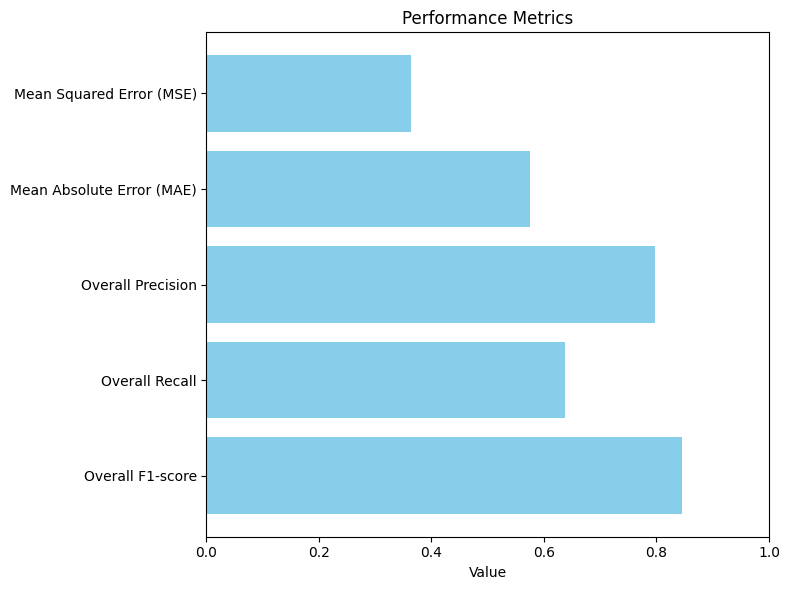

In [32]:
# Define your metrics and titles
metrics = {
    "Mean Squared Error (MSE)": mse,
    "Mean Absolute Error (MAE)": mae,
    "Overall Precision": overall_precision,
    "Overall Recall": overall_recall,
    "Overall F1-score": overall_f1_score
}

# Create a DataFrame
df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])

# Plotting
plt.figure(figsize=(8, 6))
plt.barh(df["Metric"], df["Value"], color='skyblue')
plt.xlabel('Value')
plt.title('Performance Metrics')
plt.xlim(0, 1)  # Set the limit for x-axis
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

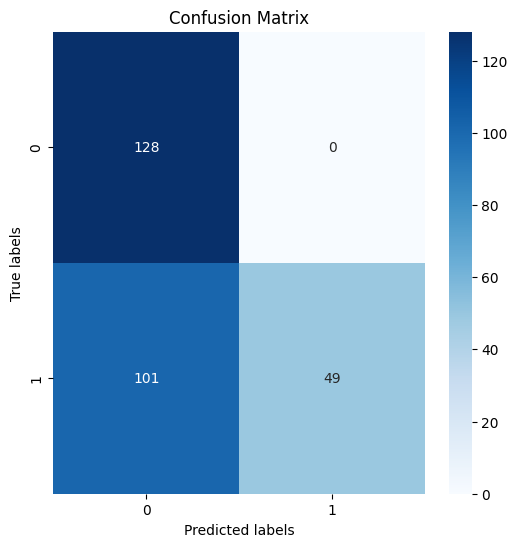

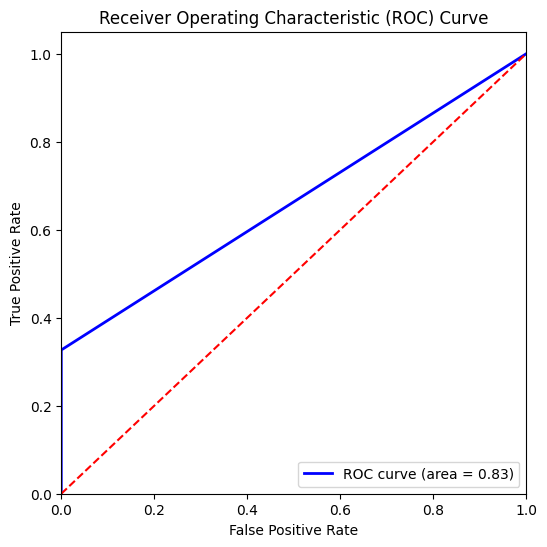

In [33]:
# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true, y_pred_classes)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = 0.83)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()